# Playing with OOI Data
Let's look at some sections of OOI hydrophone data and see if we can identify the different sounds

## Source Identification

### Segment 1
**Location**
- Central Caldera, low frequency hydrophone (AXCC1) </br>

**Time Range**
- Time range: 2018-12-15 T00:00:00 to 2018-12-15 T00:30:00

In [1]:

import ooipy
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import Audio



In [ ]:
starttime = datetime(2018,12,15)
endtime = datetime(2018,12,15,0,30)
node='AXCC1'

hdata = ooipy.get_acoustic_data_LF(starttime, endtime, node, verbose=True) #LF for low freq

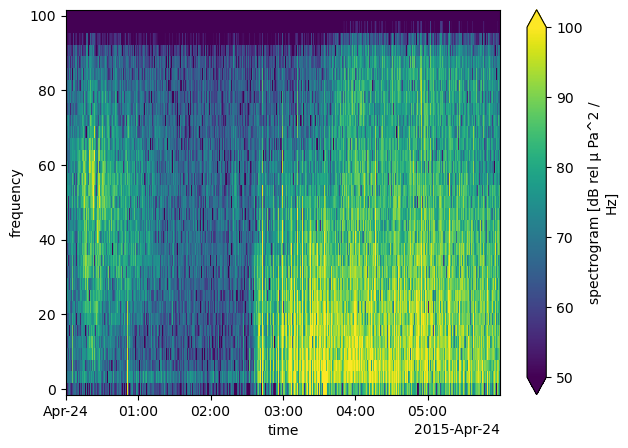

In [50]:
spec = hdata.compute_spectrogram(L=64,overlap=0 )
spec.shape
fig = plt.figure(figsize=(7,5))
spec.plot(x='time', vmax=100, vmin=50)

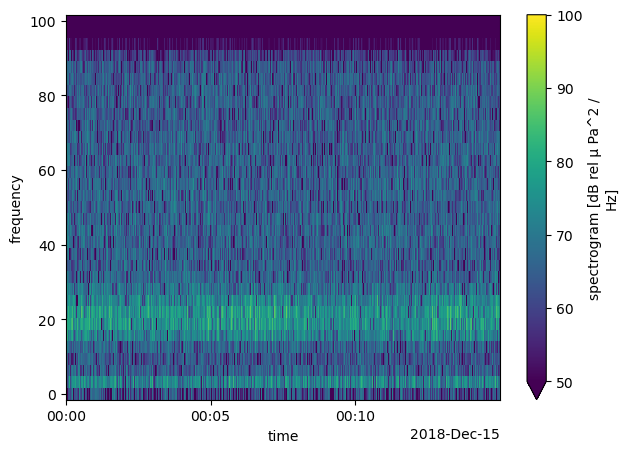

In [32]:

Audio(hdata.data, rate=200*5)

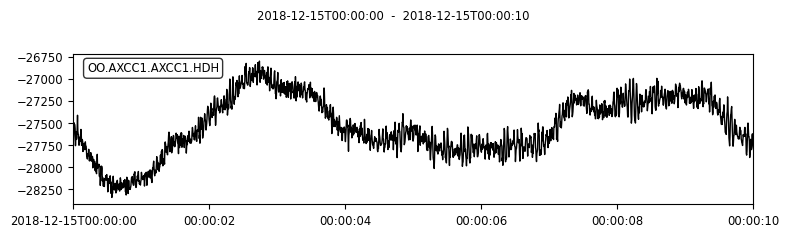

In [28]:
st = hdata.stats.starttime


_ = hdata.plot(starttime=st, endtime=st+10)

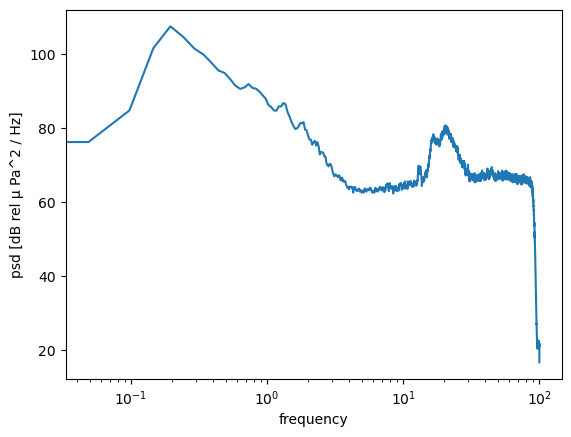

In [22]:
psd = hdata.compute_psd_welch()
psd.plot()
plt.xscale('log')

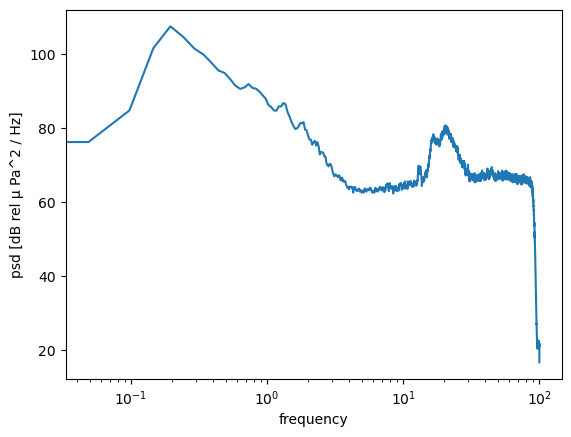

In [24]:
psd.loc[:2000].plot()
plt.xscale('log')

### Segment 2
**Location**
- Axial Base, low frequency hydrophone (AXBA1)

**Time Range**
- 2015-04-24 T00:00:00 to 2015-04-24 T12:00:00

In [48]:
starttime = datetime(2015,4,24)
endtime = datetime(2015,4,24,12)
node='AXBA1'

hdata = ooipy.get_acoustic_data_LF(starttime, endtime, node, verbose=True) #LF for low freq

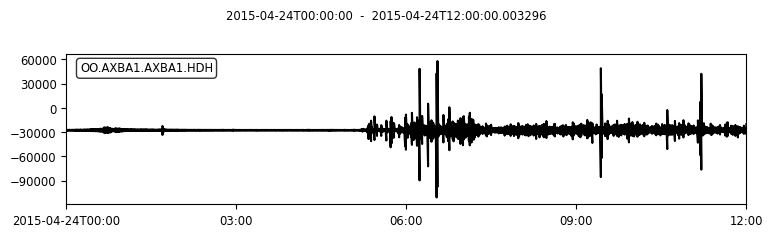

In [49]:
st = hdata.stats.starttime
_ = hdata.plot(starttime=st)

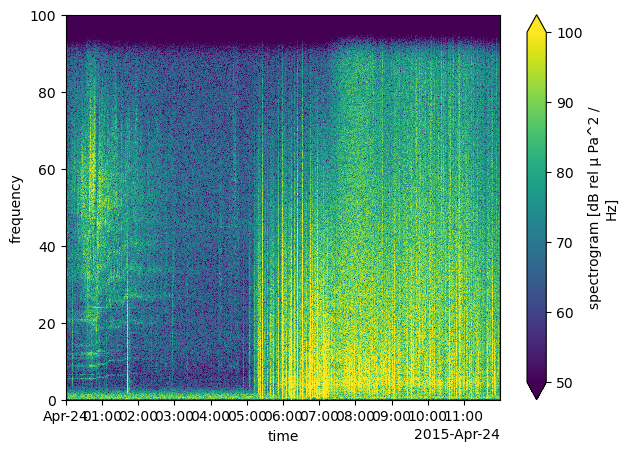

In [62]:
spec = hdata.compute_spectrogram()
spec.shape
fig = plt.figure(figsize=(7,5))
spec.plot(x='time', vmax=100, vmin=50)

In [57]:
Audio(hdata.data[200*60*60*6:200*60*60*7], rate=200*5)

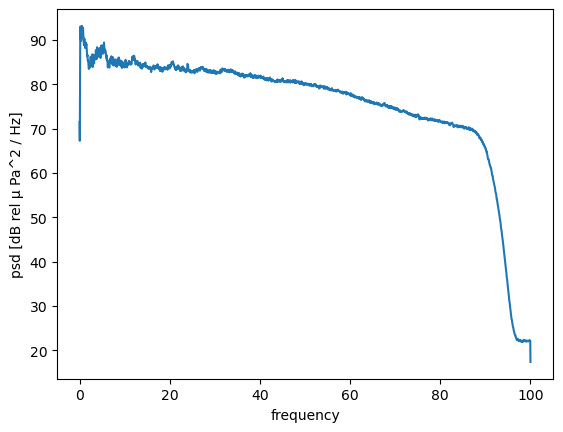

In [60]:
psd = hdata.compute_psd_welch()


psd.loc[:2000].plot()
# plt.xscale('log')

### Segment 3

**Locations**
- Axial Base, broadband hydrophone (LJ03A)
- Central Caldera, low frequency hydrophone (AXCC1)

**Time Range**
- 2019-07-29 T07:00:00 to 2019-07-29 T07:01:00


In [7]:
starttime = datetime(2019,7,29,7)
endtime = datetime(2019,7,29,7,0,8)
node='AXCC1'

hdata_central_caldera = ooipy.get_acoustic_data_LF(starttime, endtime, node, verbose=True) #LF for low freq

node='LJ03A'
hdata_axial_base = ooipy.get_acoustic_data(starttime, endtime, node, verbose=True, jupyter_hub=True) #LF for low freq

Fetching URLs...
Sorting valid URLs for Time Window...
100%|██████████| 4/4 [00:00<00:00, 11.57it/s]
file fragmented but timestamps are unique. Segment kept
Merging 4 Traces...
Data has Gaps


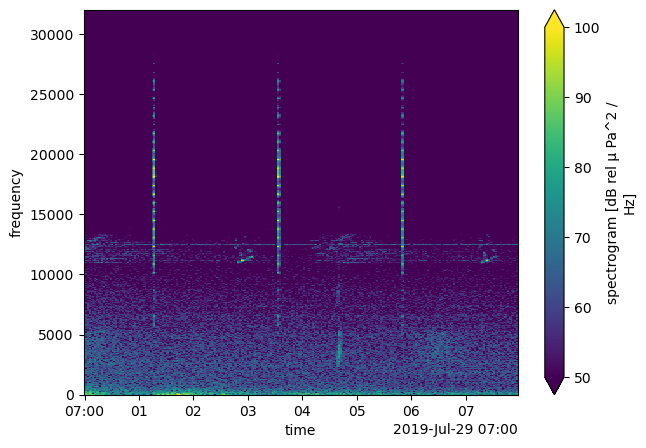

In [8]:
spec = hdata_axial_base.compute_spectrogram()
fig = plt.figure(figsize=(7,5))
spec.plot(x='time', vmax=100, vmin=50)

In [9]:
Audio(hdata_axial_base.data, rate=64000)

In [75]:
Audio(hdata_central_caldera.data, rate=200)


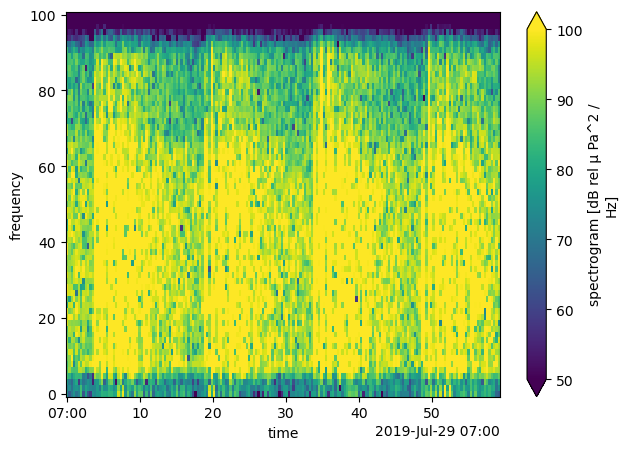

In [73]:
spec = hdata_central_caldera.compute_spectrogram(L=128)
fig = plt.figure(figsize=(7,5))
spec.plot(x='time', vmax=100, vmin=50)

### Segment 4
**Locations**
- Central Caldera, low frequency hydrophone (AXCC1)

**Time Range**
- 2019-07-01 T00:00:00 to 2019-09-01 T00:00:00

In [3]:
starttime = datetime(2019,7,1)
endtime = datetime(2019,9,1)
node='AXCC1'

hdata_central_caldera = ooipy.get_acoustic_data_LF(starttime, endtime, node, verbose=True) #LF for low freq


   error loading data from OOI server.
      likely that time window doesn't have data


### Segment 5

**Location**
- Oregon Offshore, broadband hydrophone (LJ01C)

**Time Range**
- 2024-01-01 T00:00:00 to 2024-01-01 T00:05:00

In [2]:
starttime = datetime(2024,1,1,1)
endtime = datetime(2024,1,1,3)

node='LJ01C'
hdata_axial_base = ooipy.get_acoustic_data(starttime, endtime, node, verbose=True, jupyter_hub=True) #LF for low freq

Fetching URLs...
Sorting valid URLs for Time Window...
100%|██████████| 27/27 [00:11<00:00,  2.27it/s]
Merging 27 Traces...


In [ ]:
spec = hdata_axial_base.compute_spectrogram()
fig = plt.figure(figsize=(7,5))
spec.plot(x='time', vmax=100, vmin=50)

## Longterm spectral trends
- look at 8 year, 15 - 25 Hz average spectral band